# **GOAL: TO PREDICT CAR PRICES**

**I use 3 different models throughout my project. (Random Forest Regressor, Linear regression, and a decision tree regressor)**

# **MODULES/PACKAGES**

### **PACKAGES**###

In [ ]:
#Here we install the packagaes due to the fact that it is not installed
!pip install PyPDF2
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.4 MB/s eta 0:00:00


### **MODULES** ###

In [ ]:
#Here we use the pandas module for data preprocessing, reading datasets, etc.
import pandas as pd
#Here we use this module for plotting/graphing
import matplotlib.pyplot as plt
#Here we use the seaborn module for color coding the scatterplot/creating one
import seaborn as sns
#Here we use the import feature that is provided from the google.colab module
from google.colab import files
#Here we import t
import os
#Here we import the standarad scaler for scaling the data and label encoder for encoding the labels from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Here we import the train_test_split feature from the sklearn.model_selection module for splitting the train and test
from sklearn.model_selection import train_test_split
#Here we import the Linear Regression feature from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression
#Here we import the KNN feature from the sklearn.neigbors module
from sklearn.neighbors import KNeighborsClassifier
#Here we import the metrics feature from the sklearn module for calculating the scores of our model
from sklearn import metrics
#Here we import the sklearn tree for the decision tree
import sklearn.tree
#Here we import the random forest regressor feature from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor
#Here we import the decision tree regressor feature from the sklearn module
from sklearn.tree import DecisionTreeRegressor
#Here we import the export_graphviz feature from the sklearn.tree module for visualizing the decision regressor tree
from sklearn.tree import export_graphviz
#Here we just use this module as a connection to the expor_graphviz module for visualizing the decision regressor tree, and this was only imported only after the package was installed for this specific module
import graphviz
#Here we import the PyPDF2 module for displaying the text in the file, and this was only imported only after the package was installed for this specific module
import PyPDF2

# **KAGGLE CONFIGURATION**

In [ ]:
#Here we install Kaggle
!pip install -q kaggle
#Use the Files.upload feature
files.upload()
#Make a directory/folder for the kaggle.json
!mkdir ~/.kaggle
#Copy the Kaggle.json
!cp kaggle.json ~/.kaggle/
#Set edit permissions
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 58.1MB/s]


In [ ]:
#Make a directory/folder called data for saving the dataset and then unzipping it
!mkdir data
!unzip vehicle-dataset-from-cardekho -d data
#Checking the data
!ls -lh data

Archive:  vehicle-dataset-from-cardekho.zip
  inflating: data/CAR DETAILS FROM CAR DEKHO.csv  
  inflating: data/Car details v3.csv  
  inflating: data/car data.csv       
  inflating: data/car details v4.csv  
total 1.7M
-rw-r--r-- 1 root root   17K Jan 14  2023 'car data.csv'
-rw-r--r-- 1 root root  347K Jan 14  2023 'CAR DETAILS FROM CAR DEKHO.csv'
-rw-r--r-- 1 root root 1018K Jan 14  2023 'Car details v3.csv'
-rw-r--r-- 1 root root  345K Jan 14  2023 'car details v4.csv'


We are just going to use the car data.csv file from the entire dataset.

# **DATASET CONFIGURATION**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/data/car data.csv')

# Display the first few rows of the dataset
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [ ]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Here we see more data from the dataset
df.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Here we can see that we have at least 301 rows and 9 columns

In [ ]:
df.dropna(inplace = True)

In [ ]:
# We need to fix the categorical data as we can see that there are str types rather than integers
df.replace({'Fuel_Type': {'Petrol':1,'Diesel':0, 'CNG': 2}}, inplace = True)

df.replace({'Seller_Type': {'Dealer':1,'Individual':0}}, inplace = True)

df.replace({'Transmission': {'Automatic':1,'Manual':0,'CNG': 2}}, inplace = True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,0


After we have fixed the values to represent numbers from strings we can see the changes.

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,1,1,0,0
1,2013,9.54,43000,0,1,0,0
2,2017,9.85,6900,1,1,0,0
3,2011,4.15,5200,1,1,0,0
4,2014,6.87,42450,0,1,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0
297,2015,5.90,60000,1,1,0,0
298,2009,11.00,87934,1,1,0,0
299,2017,12.50,9000,0,1,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# **SCATTER PLOT ANALYSIS**

<Axes: xlabel='Kms_Driven', ylabel='Present_Price'>

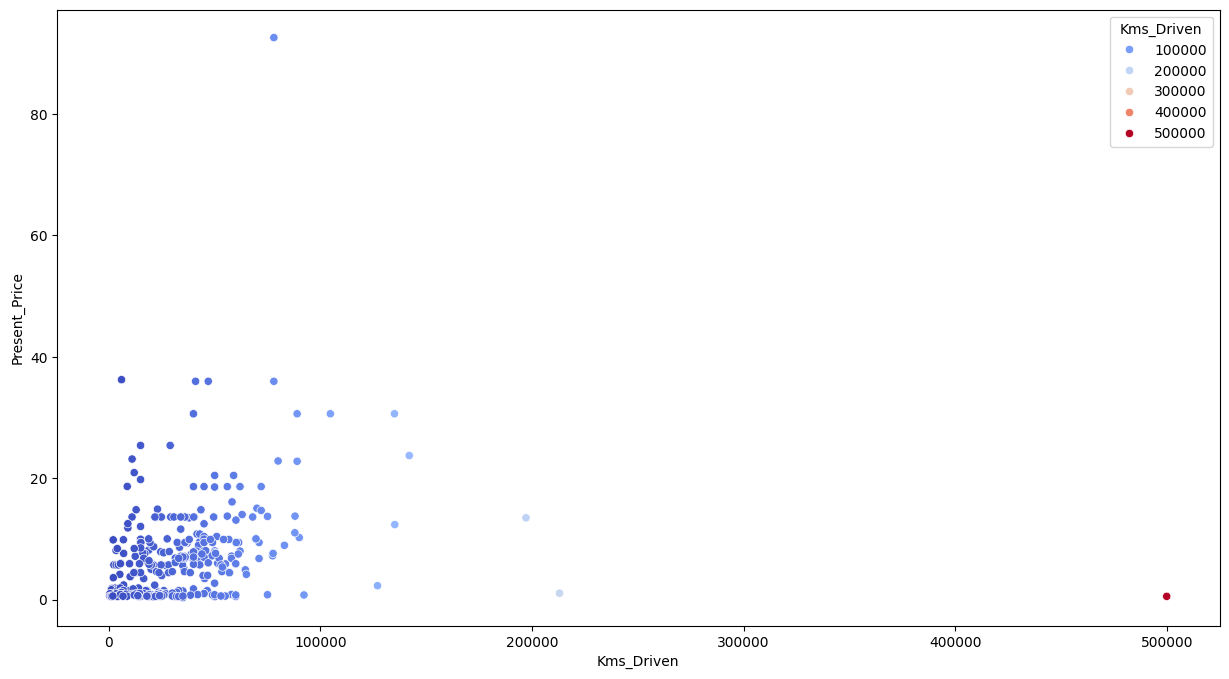

In [ ]:
# Here we create a scatter plot that focuses on the Kilometers driven and the present price
plt.figure(figsize=(15, 8))
sns.scatterplot(x="Kms_Driven", y="Present_Price", data=df, hue="Kms_Driven", palette= "coolwarm")

This shows that as the higher kilometers driven are the more expensive prices in cars.

# **DATASET SPLITTING**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0
297,brio,2015,4.00,5.90,60000,1,1,0,0
298,city,2009,3.35,11.00,87934,1,1,0,0
299,city,2017,11.50,12.50,9000,0,1,0,0


# **LINEAR REGRESSION MODEL**

In [ ]:
#Created a linear regression
Reg = LinearRegression()
#Here we
Reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = Reg.predict(X_train)
y_test_pred = Reg.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = Reg.score(X_train, y_train)
test_accuracy = Reg.score(X_test, y_test)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 88.24621379730495
Test accuracy: 86.4911301424499


Here we can see that this accuracy is pretty good showing that it can predict car prices.

After we learned this a few other techniques, I updated it and wanted to see if the accuracy can improve by using another model. Therefore, I used a random forest regressor and a decision tree regressor.

# **Decision Tree Regressor**

Here we also use a Decision Tree Regressor Model

In [ ]:
# Create the decision tree regressor model
regressor = DecisionTreeRegressor()
# Train the model on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = regressor.score(X_train, y_train)
test_accuracy = regressor.score(X_test, y_test)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 100.0
Test accuracy: 92.71173544051891


Here we can see that the results improved by a lot for the test accuracy from the linear regression model.

Here we install the package to import the module.

[Text(0.726735674702925, 0.9722222222222222, 'x[1] <= 24.56\nsquared_error = 27.146\nsamples = 270\nvalue = 4.732'),
 Text(0.4744951154021938, 0.9166666666666666, 'x[1] <= 5.645\nsquared_error = 11.94\nsamples = 258\nvalue = 3.924'),
 Text(0.23740287934186471, 0.8611111111111112, 'x[1] <= 3.455\nsquared_error = 0.939\nsamples = 114\nvalue = 1.092'),
 Text(0.1738459780621572, 0.8055555555555556, 'x[1] <= 1.23\nsquared_error = 0.162\nsamples = 91\nvalue = 0.659'),
 Text(0.11643053016453382, 0.75, 'x[1] <= 0.794\nsquared_error = 0.04\nsamples = 65\nvalue = 0.447'),
 Text(0.05690127970749543, 0.6944444444444444, 'x[2] <= 17000.0\nsquared_error = 0.02\nsamples = 35\nvalue = 0.325'),
 Text(0.02010968921389397, 0.6388888888888888, 'x[1] <= 0.735\nsquared_error = 0.011\nsamples = 13\nvalue = 0.46'),
 Text(0.010968921389396709, 0.5833333333333334, 'x[0] <= 2010.5\nsquared_error = 0.004\nsamples = 10\nvalue = 0.413'),
 Text(0.007312614259597806, 0.5277777777777778, 'squared_error = 0.0\nsamples 

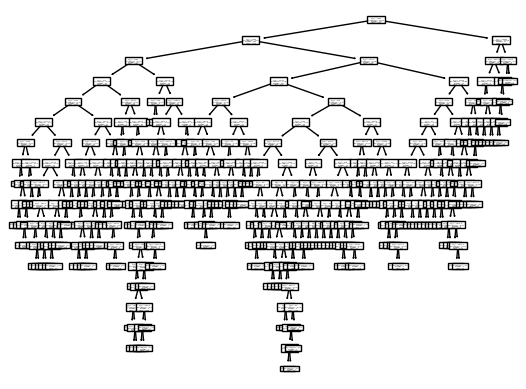

In [ ]:
#Here we plot the decision tree which is not perfectly able to be seen but can be seen in the pdf version/format that is set
sklearn.tree.plot_tree(regressor)

In [ ]:
# Export the decision tree to a graphviz file
dot_data = export_graphviz(regressor, out_file=None)

# Create a graphviz object from the dot data
graph = graphviz.Source(dot_data)

# Save the decision tree
graph.render('decision_tree')

'decision_tree.pdf'

In [ ]:
# Open the PDF file
pdf_reader = PyPDF2.PdfReader('/content/decision_tree.pdf')

# Extract the text from the first page of the PDF file
page = pdf_reader.pages[0]

# Display the text on the screen
print(page.extract_text())

x[1] <= 24.56
squared_error = 27.146
samples = 270
value = 4.732
x[1] <= 5.645
squared_error = 11.94
samples = 258
value = 3.924True x[1] <= 36.095
squared_error = 37.826
samples = 12
value = 22.116False
x[1] <= 3.455
squared_error = 0.939
samples = 114
value = 1.092x[0] <= 2015.5
squared_error = 9.275
samples = 144
value = 6.166
x[1] <= 1.23
squared_error = 0.162
samples = 91
value = 0.659x[0] <= 2010.5
squared_error = 0.335
samples = 23
value = 2.804
x[1] <= 0.794
squared_error = 0.04
samples = 65
value = 0.447x[2] <= 4050.0
squared_error = 0.074
samples = 26
value = 1.189
x[2] <= 17000.0
squared_error = 0.02
samples = 35
value = 0.325x[0] <= 2015.5
squared_error = 0.026
samples = 30
value = 0.589
x[1] <= 0.735
squared_error = 0.011
samples = 13
value = 0.46x[0] <= 2015.5
squared_error = 0.009
samples = 22
value = 0.245
x[0] <= 2010.5
squared_error = 0.004
samples = 10
value = 0.413x[0] <= 2013.5
squared_error = 0.002
samples = 3
value = 0.617
squared_error = 0.0
samples = 1
value = 

To attain the latest decision regressor tree, just go to the files page in colab and download it.

Now it has been saved to the data to view as a pdf, here it is. (This can be used to see it better if needed)

[Decision Tree](https://drive.google.com/file/d/1ZJiK7j9t5zD3enY4zyuSYZKa1AKQGpjh/view?usp=sharing)

# **RANDOM FOREST REGRESSOR (Ensemble Model)**

Here we use the ensemble methods to improve the accuracy.

In [ ]:
#Here we set up the random forest regressor and store it as a variable
forest = RandomForestRegressor()
#Here we pass in the train values
forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = forest.score(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 98.67784291288594
Test accuracy: 98.1923621672391


As we can see, the accuracy became much higher than the linear regression
model as it improved by 11.7906763% and improved by 3% from the decision tree regressor, which shows that through the ensemble methods of a forest model and sklearns decision tree feature, we can get better predictions due to its accuracy as it improved by a lot.